In [32]:
import pandas as pd
import numpy as np
from pathlib import Path

# import data

In [33]:
fln = 'surfweer_data_2021_01_26_clean.csv'

In [41]:
df = pd.read_csv(fln, index_col=0, parse_dates=['report_date','post_date'])
df['week'] = df["report_date"].apply(lambda x:x.isocalendar()[1])
df['weekday'] = df["report_date"].apply(lambda x:x.weekday())

# calendar heatmap

In [77]:
from matplotlib import colors
import matplotlib.pyplot as plt


In [223]:
calendar = np.nan * np.zeros((8, 54))

week, weekday = zip(*[date.isocalendar()[1:] for date in df_sub["report_date"]])
calendar[weekday, week] = 1

In [ ]:
# to-do list
# include month or weekday as axis label 
# 

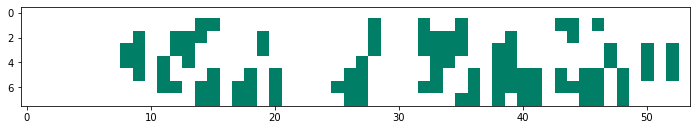

In [224]:
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(calendar, cmap='summer')

In [231]:
# data

In [ ]:
# example code 

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

def main():
    dates, data = generate_data()
    fig, ax = plt.subplots(figsize=(6, 10))
    calendar_heatmap(ax, dates, data)
    plt.show()

def generate_data():
    num = 100
    data = np.random.randint(0, 20, num)
    start = dt.datetime(2015, 3, 13)
    dates = [start + dt.timedelta(days=i) for i in range(num)]
    return dates, data

def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1

    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar


def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='summer')
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    ax.figure.colorbar(im)

def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')

    ax.set(xticks=np.arange(7), 
           xticklabels=['M', 'T', 'W', 'R', 'F', 'S', 'S'])
    ax.xaxis.tick_top()